# Logistic Regression

Logistic regression is a statistical method for predicting binary outcomes from data.

Examples of this are "yes" vs. "no" or "young" vs. "old". 

These are categories that translate to a probability of being a 0 or a 1.

Source: [Logistic Regression](https://towardsdatascience.com/real-world-implementation-of-logistic-regression-5136cefb8125)

We can calculate the logistic regression by applying an activation function as the final step to our linear model. 

This converts the linear regression output to a probability.

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os
import csv

Generate some data

In [20]:
df_raw = pd.read_csv('dummy_data.csv')
df = df_raw[['Education', 'Experience', 'Income']]
df.head()

,Education,Experience,Income
0,0,0,18000
1,0,0,23000
2,0,1,20000
3,0,1,24000
4,0,1,22000


Text(0, 0.5, 'Income (USD)')

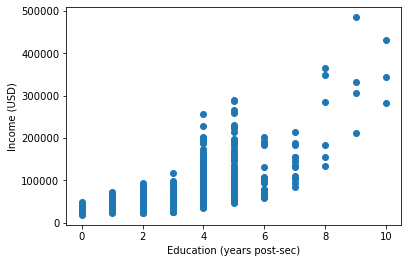

In [21]:
# Visualizing both classes
plt.scatter(df.Education, df.Income)
plt.xlabel("Education (years post-sec)")
plt.ylabel("Income (USD)")

Split our data into training and testing data

Create a logistic regression model

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

classifier = LogisticRegression(solver = 'lbfgs', max_iter=10000)

X = df[['Education', 'Experience']]
y = df['Income']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

Fit (train) our model by using the training data

In [44]:
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

Validate the model by using the test data

In [45]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.1297539149888143
Testing Data Score: 0.04697986577181208


Make predictions

In [50]:
# Predict the class (purple or yellow) of the new data point
predictions = classifier.predict(df[['Experience', 'Education']])
print("Classes are either 0 (purple) or 1 (yellow)")
print(f"The new point was classified as: {predictions}")

Classes are either 0 (purple) or 1 (yellow)
The new point was classified as: [ 24000  24000  24000  24000  24000  24000  25000  25000  25000  25000
  25000  25000  25000  25000  25000  25000  25000  25000  53000  53000
  53000  53000  53000  68000  68000  68000 156000 156000 156000 156000
 156000  32000  32000  32000  32000  32000  32000  32000  32000  32000
  32000  32000  32000  32000  34000  34000  34000  34000  34000  34000
  34000  34000  34000  53000  53000  53000  53000  53000  53000  53000
  53000  53000  53000  73000  73000  73000 156000 156000 212000 212000
 283000 283000 283000 283000 283000 283000 283000 283000 283000 283000
 283000 283000 283000  32000  32000  32000  32000  32000  32000  32000
  32000  32000  32000  32000  32000  32000  32000  32000  32000  32000
  32000  32000  32000  32000  42000  42000  42000  42000  42000  42000
  42000  55000  55000  55000  55000  55000  55000  55000  55000  55000
  55000  55000  73000  73000  73000  73000  73000  73000  73000  73000


In [51]:
predictions = classifier.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

,Prediction,Actual
274,53000,53000
285,55000,65000
173,34000,30000
452,55000,59000
214,59000,60000
...,...,...
76,64000,60000
241,138000,117000
417,138000,138000
419,138000,158000
